In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from pathlib import Path
import pandas as pd

In [3]:
#path = Path('/home/ubuntu/data/autopsy/milestone/suicide_homicide_accident/no_preprocessing')
path = Path('/nfs/research/ejguill/data/autopsy/no_preprocessing/folds/tmp')


In [4]:
df = pd.read_csv(path/'data.csv')
#df.head()

In [5]:
#df.tail()

In [6]:
bs=32

In [7]:
data_clas = TextClasDataBunch.from_csv(path, 'data.csv', bs=bs)

In [8]:
data_clas.show_batch()

text,target
"xxbos \n xxup .micro . \n xxmaj heart - no significant histopathology \n\n xxmaj lungs - patchy extravasation of red blood cells into the intra - alveolar space \n\n xxmaj kidneys - no significant histopathology \n\n xxmaj liver - no significant histopathology \n\n xxmaj hippocampus - no significant histopathology \n\n xxmaj xxunk - vaginal , anal , and oral smears negative for xxunk components . \n .locationhead and neck \n",Homicide
"xxbos \n xxup .micro . \n xxup none \n .locationhead \n .injuryfirearm injury . \n xxup .injurydesc . \n xxup penetrating xxup gunshot xxup wound xxup of xxup head ( a ) \n\n xxup entrance : xxmaj on the left side of the scalp , centered 4 centimeters below the top of the head and 6 centimeters left of the anterior midline , is an entrance gunshot wound consisting of",Homicide
"xxbos \n xxup .micro . \n xxup heart : xxmaj patchy contraction band necrosis of the intraventricular septum \n\n xxup lung : xxmaj acute alveolar and xxunk hemorrhage consisting of predominantly intact erythrocytes . \n\n xxup kidney : xxmaj incidental sparse tubular and interstitial calcium xxunk deposition , otherwise no significant histopathology . \n\n xxup liver : xxmaj scattered mononuclear interstitial and interface inflammatory infiltrate with rare eosinophils , rare",Homicide
"xxbos \n xxup .micro . \n xxmaj heart : \n xxmaj focal myocyte hypertrophy . \n\n xxmaj lungs : \n xxmaj skeletal muscle in bronchial lumens and alveolar spaces , consistent with terminal aspiration ; congestion ; red blood cells within alveoli . \n\n xxmaj liver : \n xxmaj mild to moderate macrovesicular steatosis with chronic inflammation , consistent with chronic steatohepatitis . \n\n xxmaj kidney : \n xxmaj subcapsular",Homicide
xxbos \n xxup .micro . \n xxup heart : xxmaj scattered myofibers are enlarged with ' box - car ' nuclei . xxmaj there is mild endocardial fibroelastosis of the septum . \n\n xxup lung : xxmaj there is prominent atelectasis of the parenchyma . xxmaj frequent geographic areas have extravasation of red blood cells into the alveolar spaces . \n\n xxup liver : xxmaj the majority of portal tracts,Homicide


In [9]:
learn = text_classifier_learner(data_clas, drop_mult=0.5, qrnn=True, emb_sz=400, nh=1150, nl=3)


In [10]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(3e-4,3e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.549052,0.470041,0.860677
2,0.411637,0.422307,0.885417


In [11]:
from fastai.vision import *

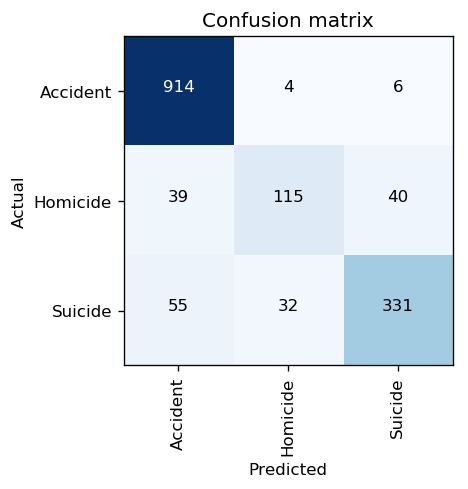

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

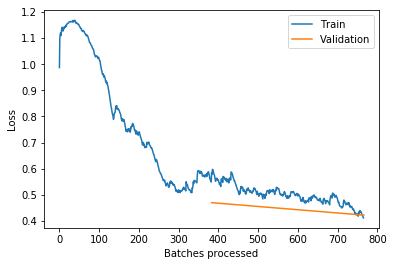

In [13]:
learn.recorder.plot_losses()

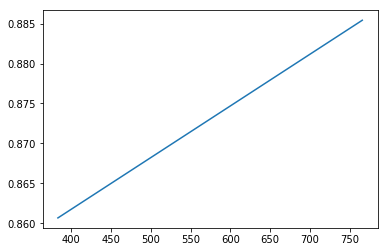

In [14]:
learn.recorder.plot_metrics()

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data_clas.valid_ds)==len(losses)==len(idxs)

True

In [16]:
loss = learn.recorder.losses

In [17]:
len(loss)

766

In [18]:
len(learn.recorder.val_losses)

2

In [19]:
lrs = learn.recorder.lrs

In [20]:
len(lrs)

766

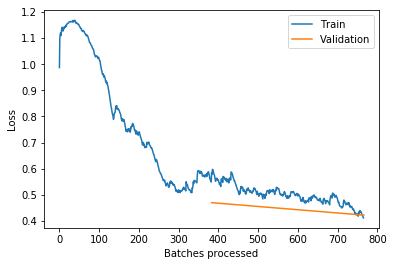

In [21]:
last = ifnone(None,len(learn.recorder.nb_batches))

_, ax = plt.subplots(1,1)
l_b = np.sum(learn.recorder.nb_batches[-last:])
iterations = range_of(learn.recorder.losses)[-l_b:]
ax.plot(iterations, learn.recorder.losses[-l_b:], label='Train')
val_iter = learn.recorder.nb_batches[-last:]
val_iter = np.cumsum(val_iter)+np.sum(learn.recorder.nb_batches[:-last])
ax.plot(val_iter, learn.recorder.val_losses[-last:], label='Validation')
ax.set_ylabel('Loss')
ax.set_xlabel('Batches processed')
ax.legend()

In [22]:
len(learn.metrics)

1

In [23]:
learn.metrics[0]

<function fastai.metrics.accuracy(input:torch.Tensor, targs:torch.Tensor) -> <function NewType.<locals>.new_type at 0x7f5a86038048>>

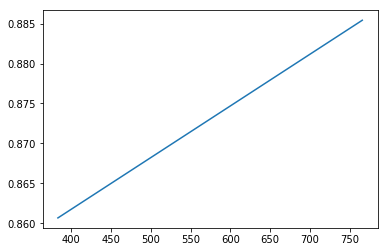

In [24]:
"Plot metrics collected during training."
assert len(learn.metrics) != 0, "There are no metrics to plot."
_, axes = plt.subplots(len(learn.metrics),1,figsize=(6, 4*len(learn.metrics)))
val_iter = learn.recorder.nb_batches
val_iter = np.cumsum(val_iter)
axes = axes.flatten() if len(learn.metrics) != 1 else [axes]
for i, ax in enumerate(axes):
    values = [met[i] for met in learn.recorder.metrics]
    ax.plot(val_iter, values)


In [25]:
learn.recorder.metrics

[[tensor(0.8607)], [tensor(0.8854)]]

In [26]:
val_iter

array([383, 766])

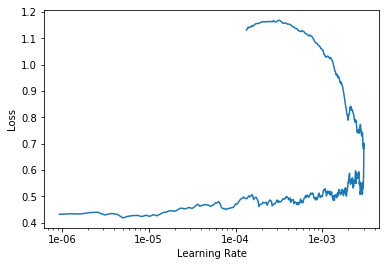

In [27]:
learn.recorder.plot()

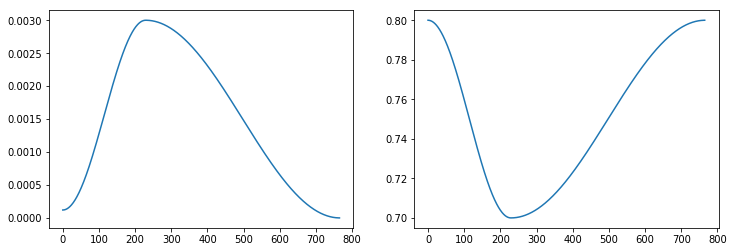

In [28]:
learn.recorder.plot_lr(show_moms=True)

In [29]:
t = slice(3e-4,3e-3)

In [30]:
t

slice(0.0003, 0.003, None)

In [31]:
s = learn.lr_range(t)

In [32]:
s

array([0.0003  , 0.000533, 0.000949, 0.001687, 0.003   ])

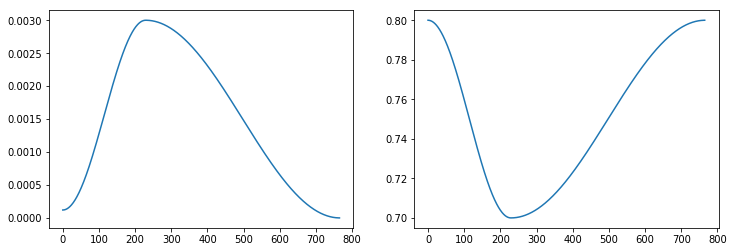

In [33]:
iterations = range_of(learn.recorder.lrs)
if True:
    _, axs = plt.subplots(1,2, figsize=(12,4))
    axs[0].plot(iterations, learn.recorder.lrs)
    axs[1].plot(iterations, learn.recorder.moms)
else: plt.plot(iterations, learn.recorder.lrs)

In [34]:
learn.get_preds()[0]

tensor([[0.0473, 0.5708, 0.3819],
        [0.0293, 0.4314, 0.5393],
        [0.1063, 0.5426, 0.3511],
        ...,
        [0.8944, 0.0624, 0.0432],
        [0.0072, 0.0254, 0.9674],
        [0.8956, 0.0512, 0.0531]])

In [35]:
learn.get_preds()[1]

tensor([1, 1, 1,  ..., 0, 2, 0])